<a href="https://colab.research.google.com/github/jaisatyaabhiram/Loan_aproval_pred/blob/main/Loan_approve_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
dataset = pd.read_csv("loan_prediction.csv")
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
dataset.shape

(614, 13)

In [4]:
dataset.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [5]:
dataset = dataset.dropna()
dataset.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [6]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
dataset.reset_index(inplace= True)

In [8]:
dataset

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
476,610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
477,611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
478,612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
dataset['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [10]:
dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [11]:
dataset['Dependents'] = dataset['Dependents'].replace(['0','1','2','3+'],['0','1','2','4'])

<ipython-input-11-952a3a156283>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Dependents'] = dataset['Dependents'].replace(['0','1','2','3+'],['0','1','2','4'])


In [12]:
dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


Visualizing the education column


<Axes: xlabel='Education', ylabel='count'>

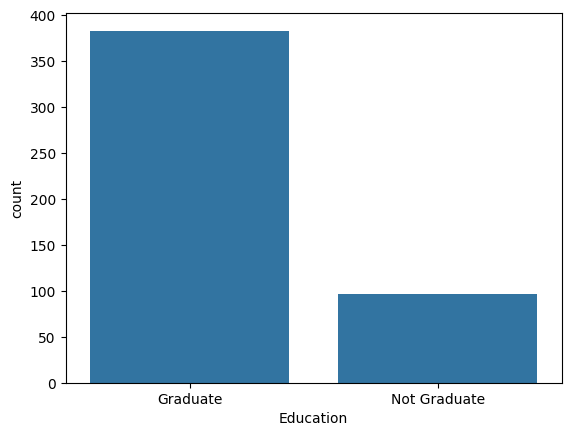

In [13]:
sns.countplot(x = dataset['Education'])

<Axes: xlabel='Education', ylabel='count'>

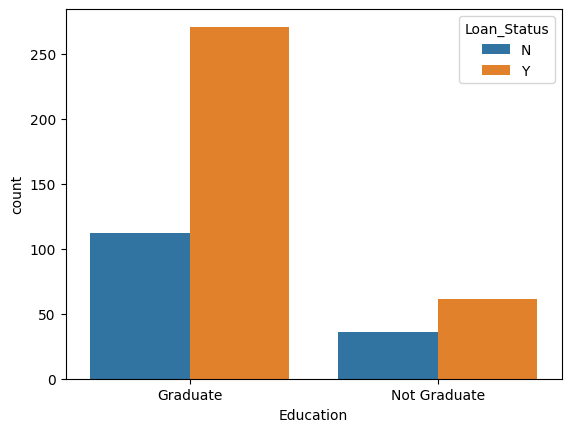

In [14]:
#combining education status with loan status
sns.countplot(x='Education',hue='Loan_Status',data=dataset)

<Axes: xlabel='Married', ylabel='count'>

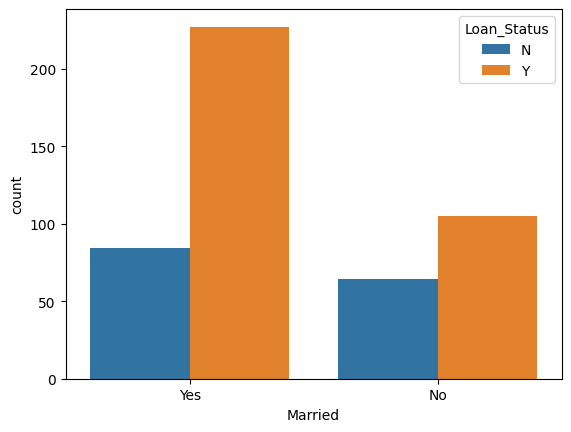

In [15]:
#married status and loan status
sns.countplot(x='Married',hue='Loan_Status',data=dataset)

In [16]:
dataset['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
dataset.head()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [18]:
dataset.replace({'Married':{'Yes':1,'No':0},
                 'Gender':{'Male':1,'Female':0},
                 'Education':{'Graduate':1,'Not Graduate':0},
                 'Self_Employed':{'No':0,'Yes':1},
                 'Property_Area':{'Rural':0,'Urban':1,'Semiurban':2}},inplace=True)

<ipython-input-18-ea56f5b3c1b5>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'Married':{'Yes':1,'No':0},


In [19]:
dataset.head()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
1,2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,Y
2,3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,Y
3,4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,Y
4,5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,Y


In [20]:
dataset['Dependents'] = dataset['Dependents'].astype('int')

In [21]:
X = dataset.iloc[: ,2:-1].values

In [22]:
X[0]

array([1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 4.583e+03,
       1.508e+03, 1.280e+02, 3.600e+02, 1.000e+00, 0.000e+00])

In [23]:
dataset.replace({'Loan_Status':{'Y':1,'N':0}},inplace=True)

<ipython-input-23-0aac0e3e8e03>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'Loan_Status':{'Y':1,'N':0}},inplace=True)


In [24]:
Y = dataset.iloc[:,-1].values

In [25]:
Y

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [26]:
X

array([[  1.,   1.,   1., ..., 360.,   1.,   0.],
       [  1.,   1.,   0., ..., 360.,   1.,   1.],
       [  1.,   1.,   0., ..., 360.,   1.,   1.],
       ...,
       [  1.,   1.,   1., ..., 360.,   1.,   1.],
       [  1.,   1.,   2., ..., 360.,   1.,   1.],
       [  0.,   0.,   0., ..., 360.,   0.,   2.]])

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

Logistic Regression

In [29]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression()
log_classifier.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
log_y_pred = log_classifier.predict(X_test)

<Axes: >

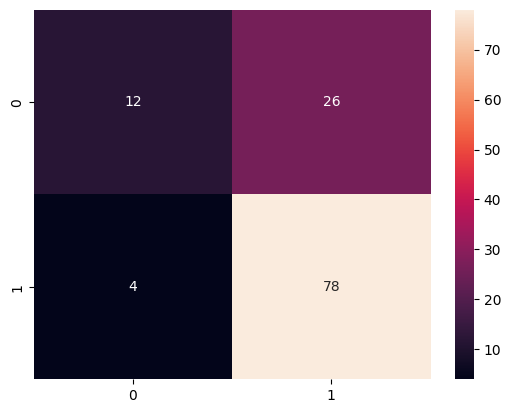

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,log_y_pred)
cm
sns.heatmap(cm,annot=True)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,log_y_pred)

0.75

KNeighbors Classifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier
k_classifier = KNeighborsClassifier(n_neighbors=15)
k_classifier.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=15)

In [52]:
k_y_pred = k_classifier.predict(X_test)

<Axes: >

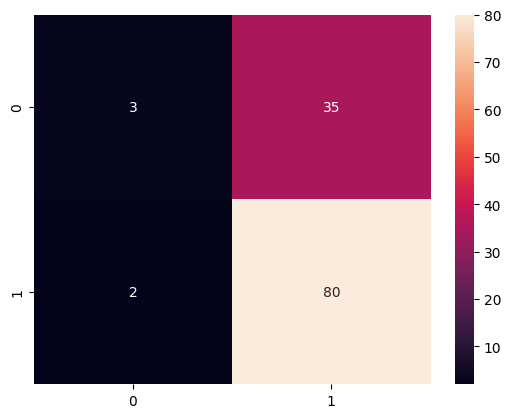

In [53]:
sns.heatmap(confusion_matrix(Y_test,k_y_pred),annot=True)

In [54]:
accuracy_score(Y_test,k_y_pred)

0.6916666666666667

SVM

In [39]:
from sklearn.svm import SVC
s_classifier = SVC()
s_classifier.fit(X_train,Y_train)

SVC()

In [40]:
s_y_pred = s_classifier.predict(X_test)

<Axes: >

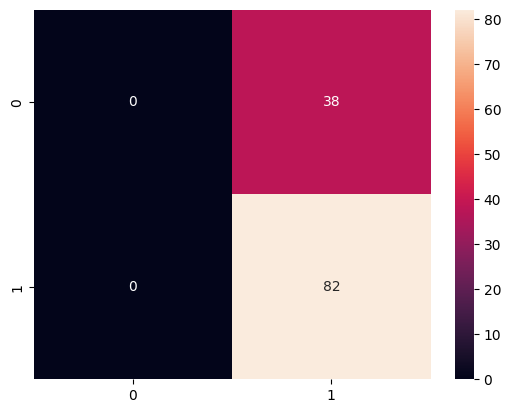

In [42]:
sns.heatmap(confusion_matrix(Y_test,s_y_pred),annot=True)

Random Forest

In [55]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 30, criterion = 'entropy')
classifier.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30)

In [56]:
y_pred = classifier.predict(X_test)

<Axes: >

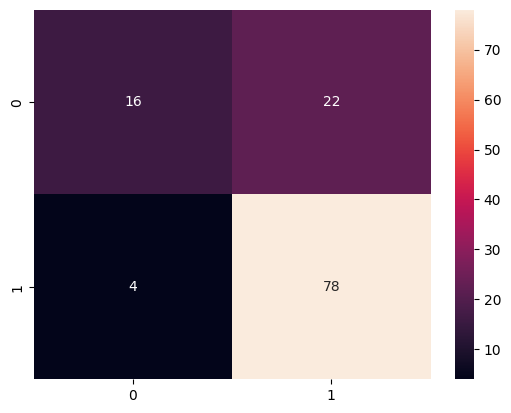

In [57]:
sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True)

In [58]:
accuracy_score(Y_test,y_pred)

0.7833333333333333